In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Advertising.csv', index_col = 0)

In [3]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
"""To illustrate gradient descent, we use radio as X and sales as y"""
X = np.array(data['radio'])
y = np.array(data['sales'])

We are trying to minimize the mean squared error (loss)
$$l = \frac{1}{N}\sum_{i=1}^{N}(y_i-(wx_i + b))^2$$
Gradient descent starts with calculating the partial derivative for every parameter
$$\frac{\partial l}{\partial w} = \frac{1}{N}\sum_{i=1}^{N}-2x_i(y_i-(wx_i + b))$$
$$\frac{\partial l}{\partial b} = \frac{1}{N}\sum_{i=1}^{N}-2(y_i-(wx_i + b))$$ 
At each epoch, we update w and b
$$w \leftarrow w - \alpha\frac{\partial l}{\partial w}$$
$$b \leftarrow b - \alpha\frac{\partial l}{\partial b}$$
Here alpha is the learning rate

In [11]:
def update_parameter(x, y, w, b, alpha):
    '''This funtion is to update the parameters(w and b)'''
    dl_dw, dl_db = 0, 0
    N = len(x)
    for i in range(N):
        dl_dw += -2*x[i]*(y[i] - (w*x[i] + b))
        dl_db += -2*(y[i] - (w*x[i] + b))
    w -= (1 / N)*alpha*dl_dw
    b -= (1 / N)*alpha*dl_db
    return w, b

def average_loss(x, y, w, b):
    """This funtion is to calculate the average loss"""
    N = len(x)
    total_error = 0
    for i in range(N):
        total_error += (y[i] - (w*x[i] + b))**2
    average_error = (total_error/ N)
    return round(average_error, 2)

def make_plot(x, y, w, b, epoch, loss):
    """Generate graph and fitted linear model"""
    plt.figure()
    plt.scatter(x, y, s = 5)
    y_pred = w*x + b
    plt.plot(x, y_pred, c = 'red')
    plt.title(f'epoch:{epoch}, loss: {loss}')

def train(x, y, w, b, alpha, epochs):
    """This function is to train the model"""
    for i in range(epochs):
        w, b = update_parameter(x, y, w, b, alpha)
        plot_count = 0
        if i % 500 == 0:
            make_plot(x, y, w, b, i, {average_loss(x, y, w, b)})
            plot_count+=1
    return w, b    

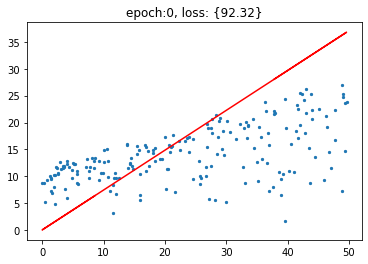

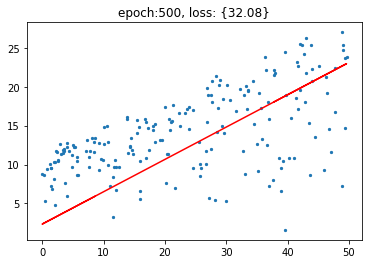

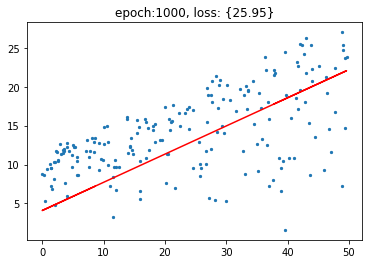

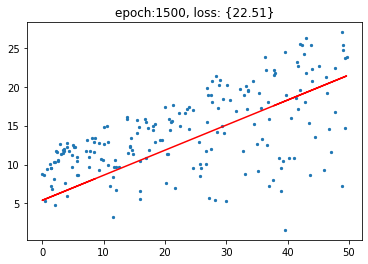

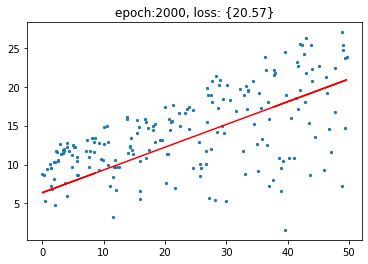

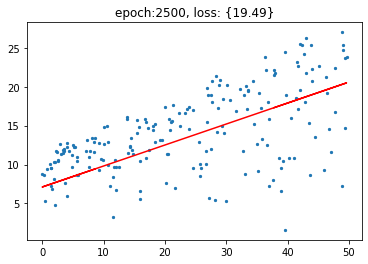

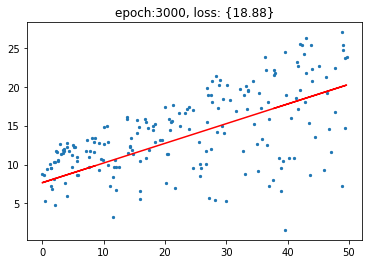

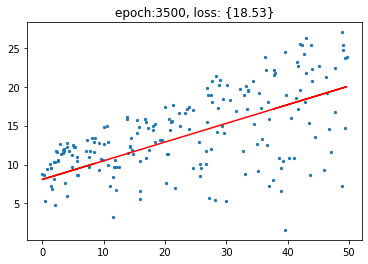

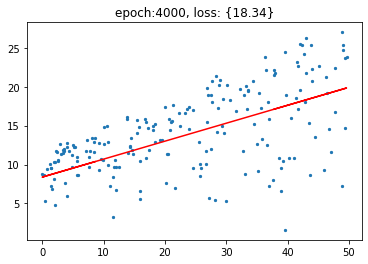

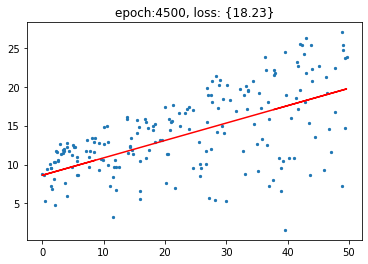

In [12]:
w, b = train(X, y, 0, 0, 0.001, 5000)